# 学習結果の描画

score は学習の際に用いた値  
fitness は一定区間毎にモデルの当てはまりをテストした値

In [1]:
!python3 -m pip install seaborn

In [51]:
import os
import dill
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pwd

/Users/work/work-worldmodel2023/WorldModel2023/otk/AgileRL-MATD3/simple_adversary_v3


In [3]:
# 保存済みの population を読み込み
path_pop = "./result/20240102-0837/pickle-population.pkl"

population = dill.load(open(path_pop,'rb'))

In [4]:
# population のなかに含まれる fitness を取り出す
fitnesses = [agent.fitness for agent in population]

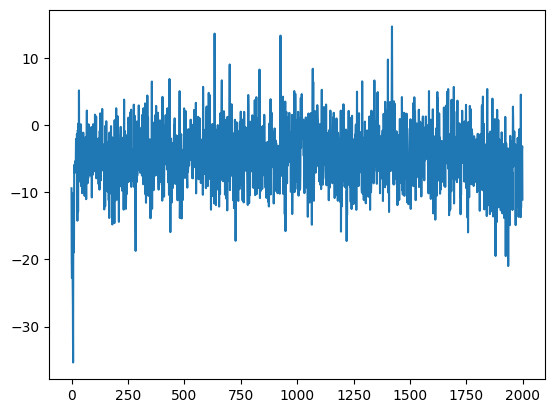

In [5]:
# fitnessを描画
plt.plot(fitnesses[0][0:-1])

In [6]:
print(fitnesses[0][0:20])

[-9.408999906273637, -20.498490274236804, -22.759990317835946, -18.2842834322506, -12.55370345691653, -22.57808849731298, -26.70087969370933, -35.341490349355055, -10.129471762362346, -18.997844686963735, -14.91043299393565, -17.05360888960826, -5.926254124674873, -7.055910785843899, -7.123125651232415, -6.954125286408323, -6.185396624982572, -5.351932188021088, -6.690368213054839, -5.251362993221414]


In [7]:
# Scoreを取り出す
scores = [agent.scores for agent in population]

print(scores[0][0:20])

[-27.90449341400793, -0.27323588551352884, 2.7856224919424193, -4.997796649592978, -57.019795280976844, -6.394063923568769, -53.027452074744275, -39.81549067777364, 18.980598821491657, -33.919687523154025, -41.06767290512349, 7.428699660812605, -42.25329104076936, 2.0488323916923274, -7.3020912697779465, -0.3930091036082288, -42.15456298050218, 4.996552158721652, 25.702498253628228, -12.627392022573336]


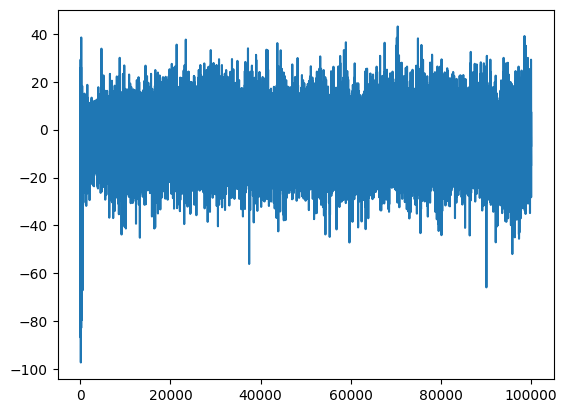

In [8]:
# Scoreを描画
plt.plot(scores[0][0:-1])

<Axes: >

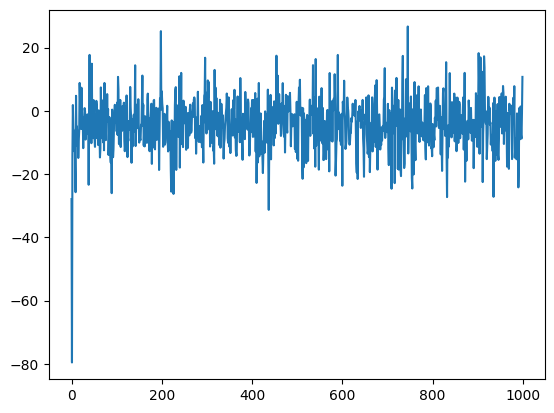

In [14]:
sns.lineplot(scores[0][0:-1:100], errorbar=('ci', 95))

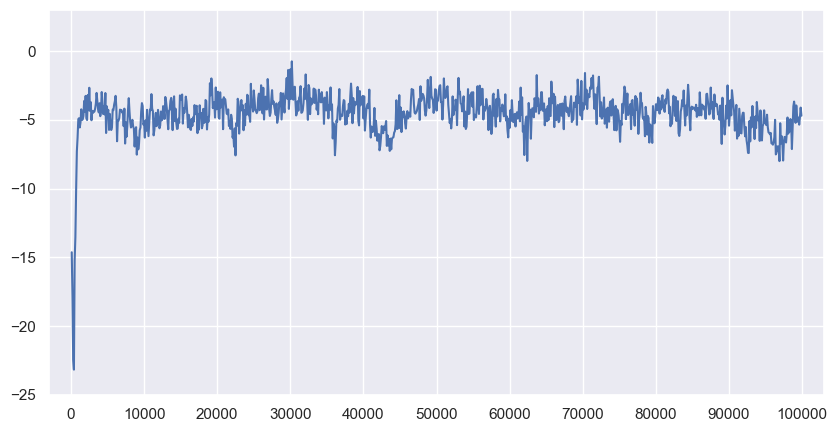

In [60]:
score = pd.DataFrame(scores[0][0:-1])
sns.set(rc={"figure.figsize": (10, 5)})

sns.lineplot(score.rolling(100, step=100).mean(), errorbar=('ci', 95), legend=False)

plt.xticks(np.arange(0, 103000, step=10000))
plt.xlim(-3000,103000)
plt.ylim(-25,3)

plt.savefig("score_simple_adversary_v3.png")
plt.show()

In [26]:
score[1:101].mean()

0   -14.63402
dtype: float64